In [1]:
import os
os.chdir('../..')

import numpy as np
import pandas as pd
import torch
import pickle
from tqdm import tqdm
from molgrad.utils import DATA_PATH

In [2]:
with open(os.path.join(DATA_PATH, 'caco2', 'data_caco2.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)

In [3]:
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit.Chem.Lipinski import NumHDonors
from rdkit.Chem.Descriptors import MolWt

from rdkit.Chem.inchi import MolFromInchi

mws = []
logps = []
tpsas = []
nhdonors = []

for inchi in inchis:
    mol = MolFromInchi(inchi)
    mws.append(MolWt(mol))
    logps.append(MolLogP(mol))
    tpsas.append(CalcTPSA(mol))
    nhdonors.append(NumHDonors(mol))

og_properties = pd.DataFrame({'mws': mws,
                              'tpsas': tpsas,
                              'logps': logps,
                              'nhdonors': nhdonors,
                              'values': values})

RDKit WARNING: [09:55:09] Enabling RDKit 2019.09.3 jupyter extensions


In [4]:
og_properties

,mws,tpsas,logps,nhdonors,values
0,336.432,91.15,3.01500,3,5.633441
1,151.165,52.82,2.00010,2,4.392703
2,180.159,63.60,1.31010,1,5.145110
3,285.815,41.49,2.57460,2,3.769551
4,229.631,160.28,-0.50753,5,5.635697
...,...,...,...,...,...
234,810.989,154.10,3.99090,3,5.956339
235,824.972,171.17,3.51750,3,6.221849
236,778.947,133.87,4.75360,2,5.765856
237,308.333,67.51,3.60960,1,4.387504


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

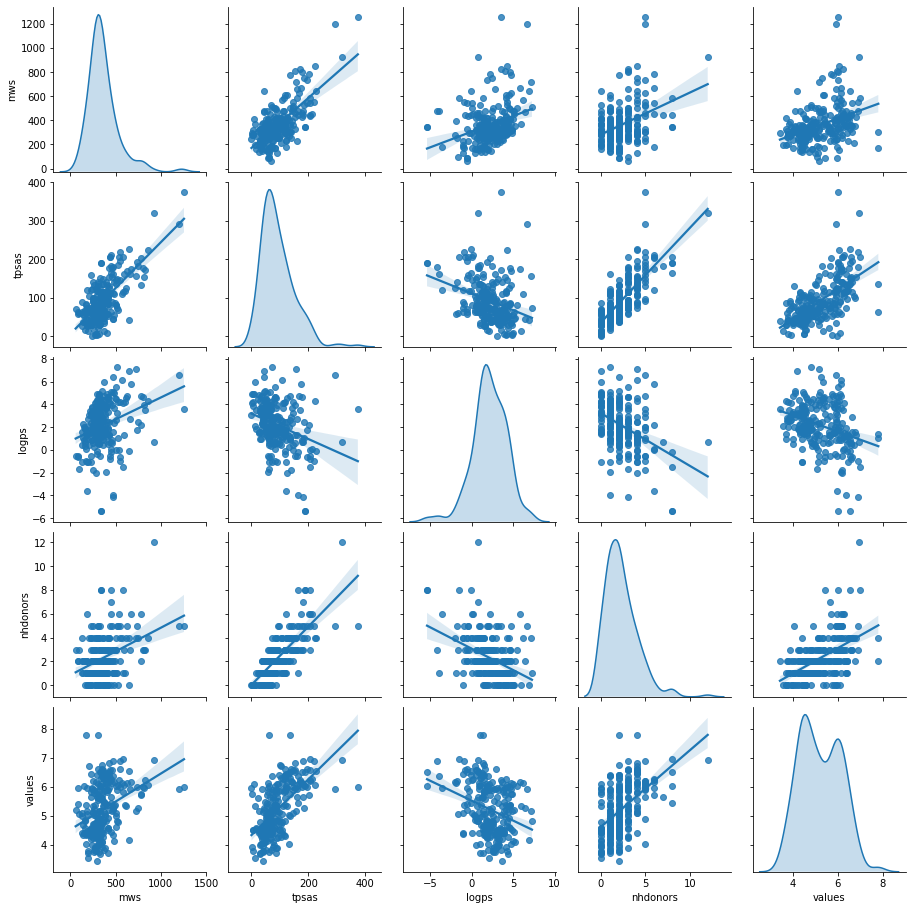

In [6]:
sns.pairplot(og_properties, diag_kind="kde", kind="reg")

In [7]:
np.corrcoef(og_properties.values.T)

array([[ 1.        ,  0.70377963,  0.31592433,  0.37216772,  0.3634165 ],
       [ 0.70377963,  1.        , -0.31237072,  0.77535612,  0.61281551],
       [ 0.31592433, -0.31237072,  1.        , -0.40736587, -0.31340548],
       [ 0.37216772,  0.77535612, -0.40736587,  1.        ,  0.53121563],
       [ 0.3634165 ,  0.61281551, -0.31340548,  0.53121563,  1.        ]])

In [8]:
with open(os.path.join(DATA_PATH, 'importances_scaled.pt'), 'rb') as handle:
    importances = pickle.load(handle)

global_importances = np.vstack(importances['caco2_global'][1]) #v2
global_importances.shape

(239, 4)

In [9]:
global_importances = np.array(global_importances) * 100
global_importances = pd.DataFrame(data=global_importances, columns=['mws', 'tpsas', 'logps', 'nhdonors'])
global_importances['values'] = values

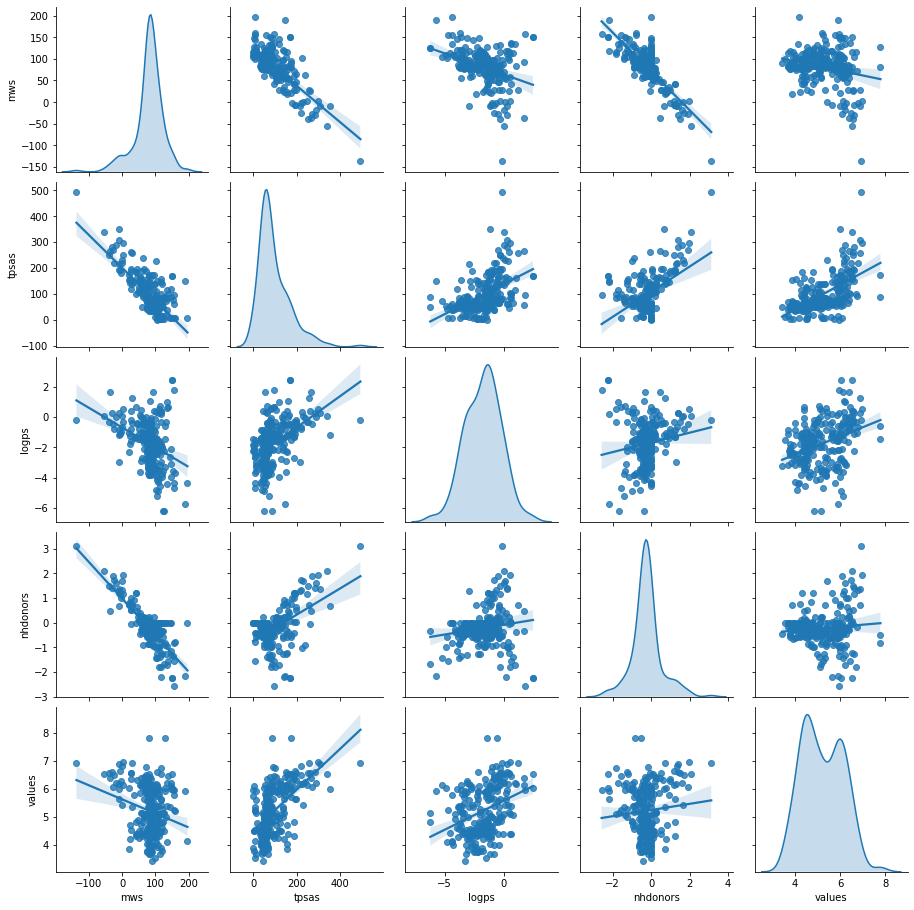

In [10]:
sns.pairplot(global_importances, diag_kind="kde", kind="reg")

In [11]:
np.corrcoef(global_importances.values.T)

array([[ 1.        , -0.73275759, -0.35627339, -0.8162458 , -0.23261596],
       [-0.73275759,  1.        ,  0.4911008 ,  0.50925454,  0.58818511],
       [-0.35627339,  0.4911008 ,  1.        ,  0.15907171,  0.35296934],
       [-0.8162458 ,  0.50925454,  0.15907171,  1.        ,  0.09289645],
       [-0.23261596,  0.58818511,  0.35296934,  0.09289645,  1.        ]])